In [56]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
edits = pd.read_json("editSteps.json")
runs = pd.read_json("runSteps.json")
steps = pd.read_json("steps.json")
from matplotlib.ticker import FuncFormatter

# rememebr to count the steps outsied the cycles

In [57]:
runs.groupby("work").output.describe()

,count,unique,top,freq
work,,,,
debugging,581,2,final output,424
programming,207,2,final output,186


In [58]:
 edits.editFiles.describe()

count    788.000000
mean       1.031726
std        0.798829
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: editFiles, dtype: float64

In [59]:
 edits.browsFile.describe()

count    788.000000
mean       0.713198
std        1.176422
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       13.000000
Name: browsFile, dtype: float64

In [60]:
runs.stepTime.apply(lambda x: x/60).describe()

count    788.000000
mean       0.479674
std        0.904214
min        0.016667
25%        0.116667
50%        0.250000
75%        0.533333
max       16.683333
Name: stepTime, dtype: float64

In [61]:
runs.groupby("work").runMethod.describe()

,count,unique,top,freq
work,,,,
debugging,581,2,manual,461
programming,207,2,manual,189


In [62]:
runs.output.describe()

count              788
unique               2
top       final output
freq               610
Name: output, dtype: object

In [63]:
x =runs.groupby("work")["output"].value_counts()
y =runs.groupby("work")["runMethod"].value_counts()


In [64]:

output_finalD =x.debugging["final output"]
output_stateD = x.debugging["program state"]
output_totalD = x.debugging["final output"] + x.debugging["program state"]

output_finalP =x.programming["final output"]
output_stateP = x.programming["program state"]
output_totalP = x.programming["final output"] + x.programming["program state"]

# 
method_manualD =y.debugging["manual"]
method_testD = y.debugging["autamted test"]
method_totalD = y.debugging["manual"] + y.debugging["autamted test"]

method_manualP =y.programming["manual"]
method_testP = y.programming["autamted test"]
method_totalP = y.programming["manual"] + y.programming["autamted test"]


outputResult = pd.DataFrame({"work":["debugging","debugging", "programming","programming","debugging","debugging", "programming","programming"],"characteristics": ["final","states",  "final","states", "manual", "tests","manual", "tests"], "percentage":[output_finalD/ output_totalD*100,output_stateD/ output_totalD*100,output_finalP/ output_totalP*100, output_stateP/ output_totalP*100,method_manualD/ method_totalD*100,method_testD/ method_totalD*100,method_manualP/ method_totalP*100,method_testP/ method_totalP*100 ], "type":["output","output","output","output","run method","run method","run method","run method"]})




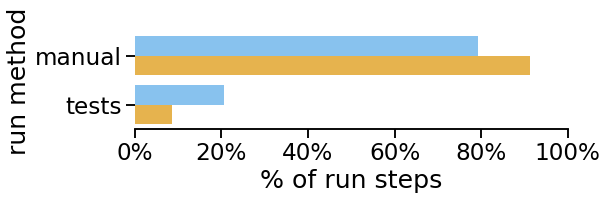

In [65]:
sns.set_context("talk", font_scale=1.4)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar', data=outputResult[outputResult["type"]=="run method"],palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h", ci=None, height=3, aspect=3,sharey=False, legend=False)

(g.set_axis_labels("% of run steps", "run method")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
g.set_xticklabels(["0%","20%","40%","60%","80%","100%"])
g.tight_layout()
plt.savefig("runMethodChara.pdf")


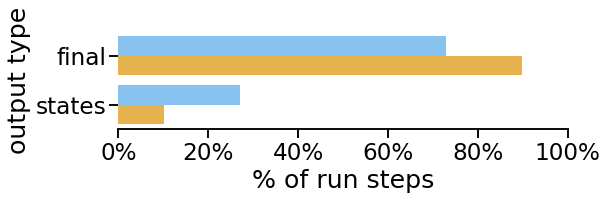

In [66]:
sns.set_context("talk", font_scale=1.4)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar', data=outputResult[outputResult["type"]=="output"],palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h", ci=None, height=3, aspect=3,sharey=False, legend=False)

(g.set_axis_labels("% of run steps", "output type")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True)) 
x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
g.set_xticklabels(["0%","20%","40%","60%","80%","100%"])
g.tight_layout()
plt.savefig("runOutputChara.pdf")

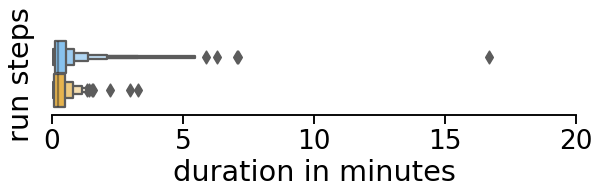

In [67]:
sns.set_context("talk", font_scale=1.6)
runs["stepTimeInMinutes"]=runs.stepTime.apply(lambda x: x/60)
runs["step"]=runs.stepTime.apply(lambda x: "run")

g = sns.catplot(x="stepTimeInMinutes", y='step', hue="work",kind="boxen", data=runs,palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h",  height=3, aspect=3, legend=False)
(g.set_axis_labels("duration in minutes", "run steps")
  .set_titles("{col_name} {col_var}")
  .set(xlim=(0, 20))
  .despine(left=True)
  .set(yticklabels=[]))
for ax in g.axes.flatten(): 
    ax.tick_params(left=False)
g.tight_layout()
plt.savefig("runTime.pdf")
 

In [68]:
ed = edits[["work","stepTime"]]
ed["step"] = "edit"
ed["stepTimeInMinutes"] = ed.stepTime.apply(lambda x: x/60)
rn = runs[["work","stepTime"]]
rn["step"] = "run"
rn["stepTimeInMinutes"] = rn.stepTime.apply(lambda x: x/60)

stepsDuration = (pd.concat([ed, rn]))


<ipython-input-68-113028a467b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed["step"] = "edit"
<ipython-input-68-113028a467b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed["stepTimeInMinutes"] = ed.stepTime.apply(lambda x: x/60)
<ipython-input-68-113028a467b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

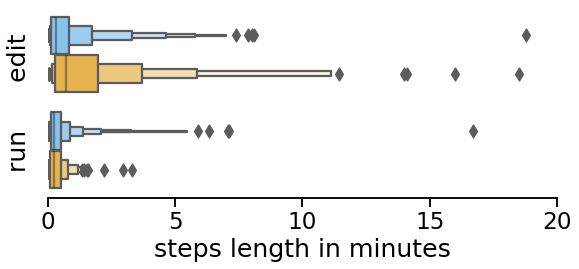

In [69]:
sns.set_context("talk", font_scale=1.4)

g = sns.catplot(x="stepTimeInMinutes", y='step', hue="work",kind="boxen", data=stepsDuration,palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h",  height=4.3, aspect=2, legend=False)
(g.set_axis_labels("steps length in minutes", "run      edit")
  .set_titles("{col_name} {col_var}")
  .set(xlim=(0, 20))
  .despine(left=True)
  .set(yticklabels=[]))
for ax in g.axes.flatten(): 
    ax.tick_params(left=False)
g.tight_layout()
plt.savefig("runAndEditTime.pdf")

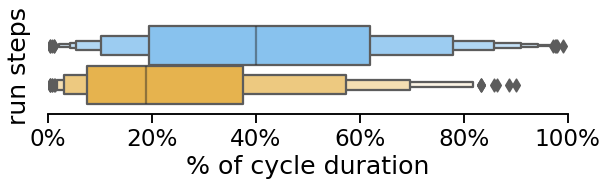

In [70]:
sns.set_context("talk", font_scale=1.4)

g=sns.catplot(x="percentage", y="step", hue="work", data=steps[steps["step"]== "run"], kind="boxen", palette={"Programming": "#FFBB35", "Debugging": "#77C5FF"},  height=3, aspect=3, legend=False )

(g.set_axis_labels("% of cycle duration", "run steps")
  .set_titles("{col_name} {col_var}")
  .set(xlim=(0, 100))
  .despine(left=True)
  .set(yticklabels=[]))
for ax in g.axes.flatten(): 
    ax.tick_params(left=False)
x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
g.set_xticklabels(x_value)
g.tight_layout()
plt.savefig("runPresentage.pdf")
 

In [71]:
steps[steps["step"]=="run"].groupby("work").describe()

percentage                                                        \
                 count       mean        std       min        25%        50%   
work                                                                           
Debugging        581.0  42.490224  26.332175  0.357143  19.565217  40.000000   
Programming      207.0  25.756026  22.689860  0.490196   7.539351  18.918919   

                                   
                   75%        max  
work                               
Debugging    61.904762  99.069767  
Programming  37.590580  90.000000

In [72]:
steps[steps["step"]=="edit"].groupby("work").describe()

percentage                                                        \
                 count       mean        std       min        25%        50%   
work                                                                           
Debugging        581.0  52.686844  26.278540  0.930233  31.884058  54.545455   
Programming      207.0  59.203462  27.433419  0.461538  38.089623  64.516129   

                                   
                   75%        max  
work                               
Debugging    75.000000  99.642857  
Programming  82.049383  99.122807

In [73]:
x =edits.groupby("work")["editFiles"].value_counts(sort=False,normalize=True)
y =edits.groupby("work")["browsFile"].value_counts(sort=False,normalize=True)



In [74]:
x

work         editFiles
debugging    0            0.177281
             1            0.731497
             2            0.075731
             3            0.005164
             4            0.006885
             5            0.003442
programming  0            0.154589
             1            0.613527
             2            0.130435
             3            0.043478
             4            0.033816
             5            0.009662
             6            0.009662
             7            0.004831
Name: editFiles, dtype: float64

In [75]:
y


work         browsFile
debugging    0            0.597246
             1            0.277108
             2            0.075731
             3            0.032702
             4            0.006885
             5            0.005164
             6            0.001721
             12           0.001721
             13           0.001721
programming  0            0.468599
             1            0.289855
             2            0.149758
             3            0.053140
             4            0.024155
             5            0.009662
             9            0.004831
Name: browsFile, dtype: float64

In [76]:
outputResult2 = pd.DataFrame({"work":["debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming","debugging","programming"],"characteristics": ["0","0","1","1","2","2","+3","+3","0","0","1","1","2","2","+3","+3"],"percentage":[x.debugging[0]*100,x.programming[0]*100,x.debugging[1]*100,x.programming[1]*100,x.debugging[2]*100,x.programming[2]*100,x.debugging[3:].sum()*100,x.programming[3:].sum()*100,y.debugging[0]*100,y.programming[0]*100,y.debugging[1]*100,y.programming[1]*100,y.debugging[2]*100,y.programming[2]*100,y.debugging[3:].sum()*100,y.programming[3:].sum()*100], "files":["edit","edit","edit","edit","edit","edit","edit","edit","browse","browse","browse","browse","browse","browse","browse","browse"]})

outputResult2

,work,characteristics,percentage,files
0,debugging,0,17.728055,edit
1,programming,0,15.458937,edit
2,debugging,1,73.149742,edit
3,programming,1,61.352657,edit
4,debugging,2,7.573150,edit
5,programming,2,13.043478,edit
6,debugging,+3,1.549053,edit
7,programming,+3,10.144928,edit
8,debugging,0,59.724613,browse
9,programming,0,46.859903,browse


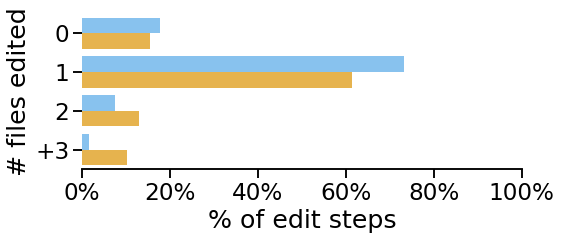

In [77]:
sns.set_context("talk", font_scale=1.4)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar',   data=outputResult2[outputResult2["files"]=="edit"],palette={"programming": "#FFBB35", "debugging": "#77C5FF"},  orient="h", ci=None, height=3.8, aspect=2.2,sharey=False, legend=False)

(g.set_axis_labels("% of edit steps", "# files edited")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
g.set_xticklabels(["0%","20%","40%","60%","80%","100%"])
g.tight_layout()
plt.savefig("editFileChara.pdf")


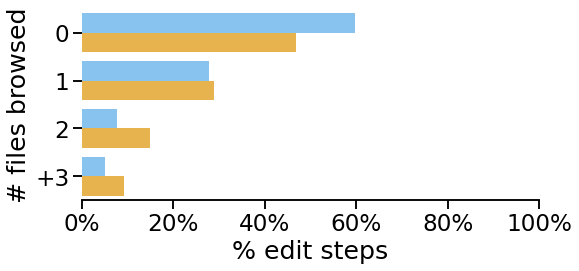

In [78]:
sns.set_context("talk", font_scale=1.4)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar',   data=outputResult2[outputResult2["files"]=="browse"],palette={"programming": "#FFBB35", "debugging": "#77C5FF"},  orient="h", ci=None, height=4.3, aspect=2,sharey=False, legend=False)

(g.set_axis_labels("% edit steps", "# files browsed")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
g.set_xticklabels(["0%","20%","40%","60%","80%","100%"])
g.tight_layout()
plt.savefig("browseFileChara.pdf")

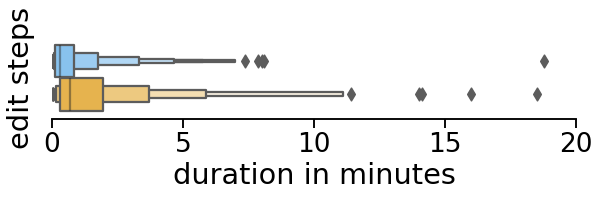

In [79]:
sns.set_context("talk", font_scale=1.6)
edits["stepTimeInMinutes"]=edits.stepTime.apply(lambda x: x/60)
edits["step"]=edits.stepTime.apply(lambda x: "edit")

g = sns.catplot(x="stepTimeInMinutes", y='step', hue="work",kind="boxen", data=edits,palette={"programming": "#FFBB35", "debugging": "#77C5FF"}, orient="h",  height=3, aspect=3, legend=False)
(g.set_axis_labels("duration in minutes", "edit steps")
  .set_titles("{col_name} {col_var}")
  .set(xlim=(0, 20))
  .despine(left=True)
  .set(yticklabels=[]))
for ax in g.axes.flatten(): 
    ax.tick_params(left=False)
g.tight_layout()
plt.savefig("editTime.pdf")

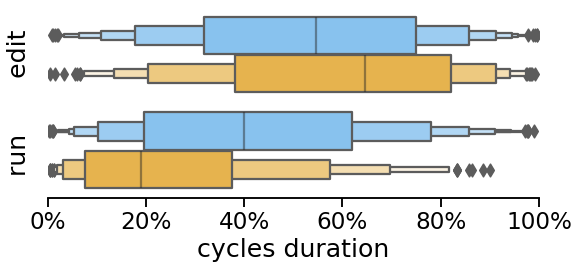

In [80]:
sns.set_context("talk", font_scale=1.4)

sns.set_context("talk", font_scale=1.4)
steps["perce"]=steps.percentage.apply(lambda x: x/100)
g=sns.catplot(x="percentage", y="step", hue="work", data=steps[steps["step"] != "other"], kind="boxen", palette={"Programming": "#FFBB35", "Debugging": "#77C5FF"},  height=4.3, aspect=2, legend=False )

(g.set_axis_labels("cycles duration", "run       edit")
  .set_titles("{col_name} {col_var}")
  .set(xlim=(0, 100))
  .despine(left=True)
  .set(yticklabels=[]))
for ax in g.axes.flatten(): 
    ax.tick_params(left=False)

x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
g.set_xticklabels(x_value)
g.tight_layout()
plt.savefig("editAndRunPresentage.pdf")

SyntaxError: invalid syntax (<ipython-input-33-653f8fe113a8>, line 1)

In [81]:
steps[steps["step"]=="edit"].groupby("work").describe()

percentage                                                        \
                 count       mean        std       min        25%        50%   
work                                                                           
Debugging        581.0  52.686844  26.278540  0.930233  31.884058  54.545455   
Programming      207.0  59.203462  27.433419  0.461538  38.089623  64.516129   

                                   perce                                \
                   75%        max  count      mean       std       min   
work                                                                     
Debugging    75.000000  99.642857  581.0  0.526868  0.262785  0.009302   
Programming  82.049383  99.122807  207.0  0.592035  0.274334  0.004615   

                                                     
                  25%       50%       75%       max  
work                                                 
Debugging    0.318841  0.545455  0.750000  0.996429  
Programming  0.380896  0.645161  0.820494  0.991228

In [82]:
otherDebuggingR, otherProgrammingR = runs[(runs.otherResourcesTime > 0)|(runs.otherIssueTime > 0)|(runs.otherNotesTime > 0)|(runs.otherInteractionTime > 0)].groupby("work").cycleTime.count()

In [83]:
otherDebuggingE, otherProgrammingE =edits[(edits.otherResourcesTime > 0)|(edits.otherIssueTime > 0)|(edits.otherNotesTime > 0)|(edits.otherInteractionTime > 0)].groupby("work").cycleTime.count()

 other inside edit step 

In [84]:
otherDebuggingE/edits.groupby("work").cycleTime.count()[0]*100

17.728055077452666

In [85]:
(otherDebuggingE+otherProgrammingE)/edits.cycleTime.count()*100

23.85786802030457

In [86]:
(otherDebuggingR+otherProgrammingR)/runs.cycleTime.count()*100
# /runs.cycleTime.count()*100

2.66497461928934